<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/5_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [3]:
df = sns.load_dataset('tips')
df['tip_pct'] = 100 * df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


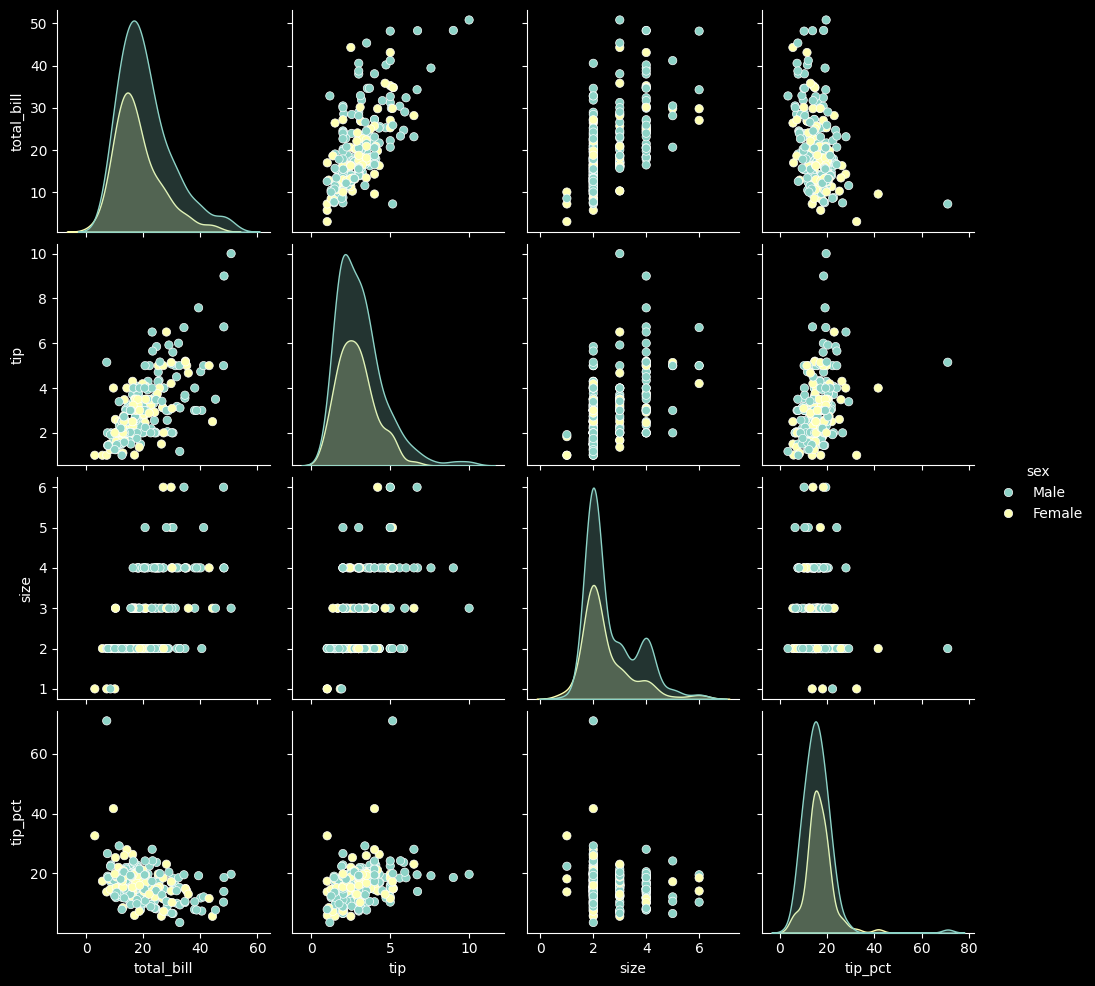

In [7]:
sns.pairplot(df, hue='sex', height=2.5, kind='scatter');  # kind='reg'



1.   it is clear that the total_bill and the tip have a relationship
2.   gender has no effect on tips


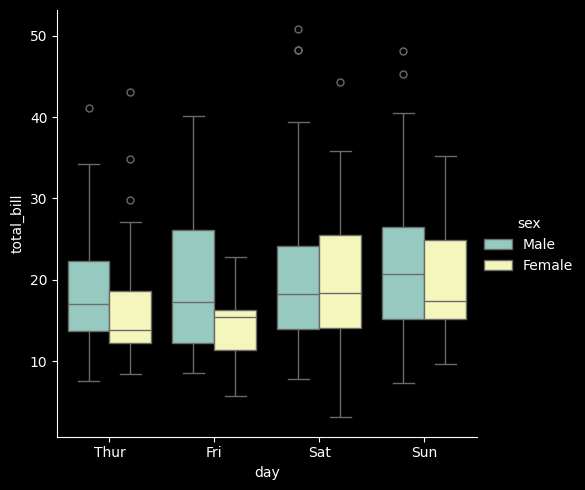

In [10]:
sns.catplot(data=df, x='day', y='total_bill', hue='sex', kind='box')

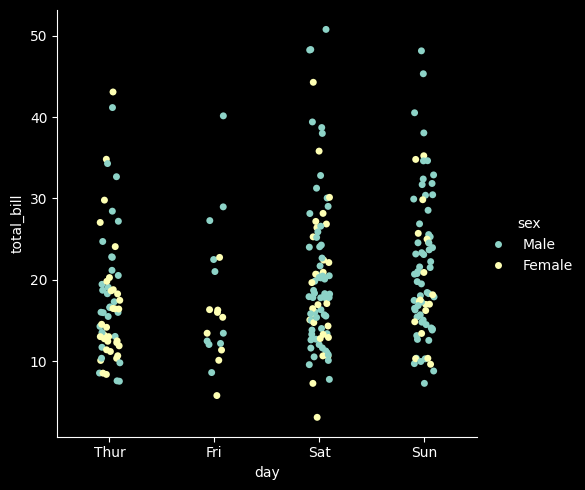

In [12]:
sns.catplot(data=df, x='day', y='total_bill', hue='sex');

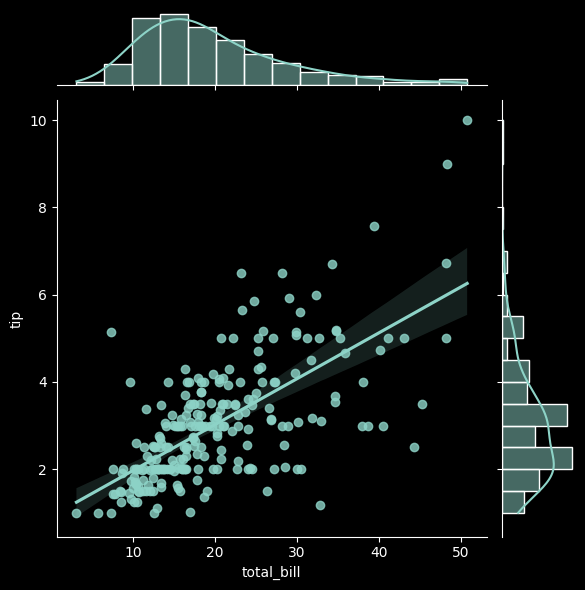

In [13]:
sns.jointplot(data=df, x="total_bill", y="tip", kind='reg');

In [15]:
df.corr(method='pearson', numeric_only=True)

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_pct,-0.338624,0.342370,-0.142860,1.000000


In [16]:
df.corr(method='spearman', numeric_only=True)

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.678968,0.604791,-0.320680
tip,0.678968,1.000000,0.468268,0.396186
size,0.604791,0.468268,1.000000,-0.152211
tip_pct,-0.320680,0.396186,-0.152211,1.000000


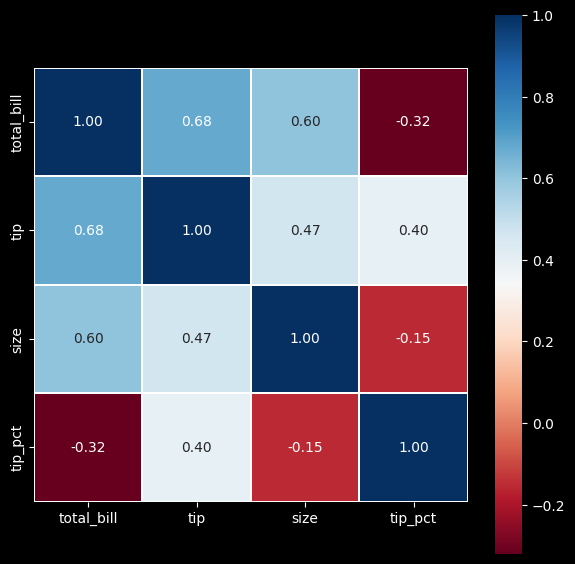

In [19]:
plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='spearman', numeric_only=True), square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

In [22]:
# Spearman's correlation is the Pearson's correlation, which was calculated between ranks.
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])
stats.spearmanr(x,y).correlation

0.644578313253012

In [23]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])
stats.pearsonr(rx,ry)[0]

0.6445783132530121